In [1]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("../Archivos/archivo_limpio.csv")

In [3]:
df.head(3)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml,salario_int
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,30000.0,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",70000.0,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None,70000.0
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",1000.0,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Matplotlib,NaN,NaN,"MySQL , MongoDB",None,NaN,Kaggle Notebooks,I do not share my work publicly,DataCamp,"Amazon Web Services (AWS) , Google Cloud Plat...","Microsoft Azure Virtual Machines , Google Clo...","Azure Machine Learning Studio , Google Cloud ...","MySQL ,PostgreSQL ,MongoDB","Microsoft Power BI,Tableau","Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML,TensorBoard,1000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   edad                                     25973 non-null  object 
 1   genero                                   25973 non-null  object 
 2   pais                                     25973 non-null  object 
 3   estudios                                 25973 non-null  object 
 4   puesto_trabajo                           25973 non-null  object 
 5   experiencia                              25973 non-null  object 
 6   lenguaje_recomendado                     24940 non-null  object 
 7   experiencia_ML                           23754 non-null  object 
 8   industria                                16325 non-null  object 
 9   tamaño_empresa                           16251 non-null  object 
 10  salario                                  15391

## COLUMNA IDE

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [5]:
df['IDE'].value_counts() #Sacamos los valores únicos de la columna IDE

Jupyter Notebook                                                                                                                   2341
Visual Studio Code (VSCode) ,Jupyter Notebook                                                                                      1412
Visual Studio Code (VSCode)                                                                                                         939
PyCharm ,Jupyter Notebook                                                                                                           820
Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook                                                                              554
                                                                                                                                   ... 
RStudio ,Visual Studio , Spyder, Vim / Emacs,Jupyter Notebook                                                                         1
Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Vi

In [6]:
df_IDE = df['IDE'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_IDE.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Vim / Emacs,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Notepad++,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
2,PyCharm,Jupyter Notebook,Other,None,None,None,None,None,None,None,None,None,None,None
3,Spyder,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None,None
4,Spyder,MATLAB,Jupyter Notebook,None,None,None,None,None,None,None,None,None,None,None


In [7]:
# Contamos los valores únicos del df_IDE -- pendiente eliminar Jupyter repetido
df_IDE.stack().value_counts()

Jupyter Notebook                16233
Visual Studio Code (VSCode)     10040
PyCharm                          7468
Jupyter (JupyterLab              5488
 Jupyter Notebooks               5488
 etc)                            5488
RStudio                          4771
Visual Studio                    4110
 Notepad++                       3937
 Spyder                          3794
 Sublime Text                    2839
MATLAB                           2203
 Vim / Emacs                     1646
 Other                           1491
 None                             526
dtype: int64

In [8]:
# Creamos un DF con la suma de los valores únicos
nombres_ide = df_IDE.stack().value_counts().reset_index() # renombramos las columnas de IDE
nombres_ide.rename(columns= {"index": "IDE_name",0: "cantidad"}, inplace= True)
nombres_ide


,IDE_name,cantidad
0,Jupyter Notebook,16233
1,Visual Studio Code (VSCode),10040
2,PyCharm,7468
3,Jupyter (JupyterLab,5488
4,Jupyter Notebooks,5488
5,etc),5488
6,RStudio,4771
7,Visual Studio,4110
8,Notepad++,3937
9,Spyder,3794


In [9]:
# Eliminamos los valores incorrectos y modificamos el nombre incorrecto
nombres_ide.drop([4,5], axis= 0, inplace= True) 
nombres_ide.replace("Jupyter (JupyterLab", "JupyterLab", inplace= True) 


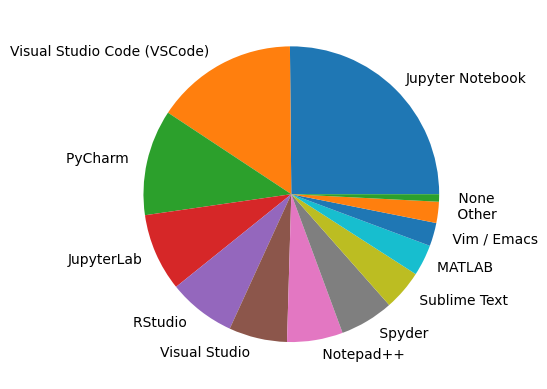

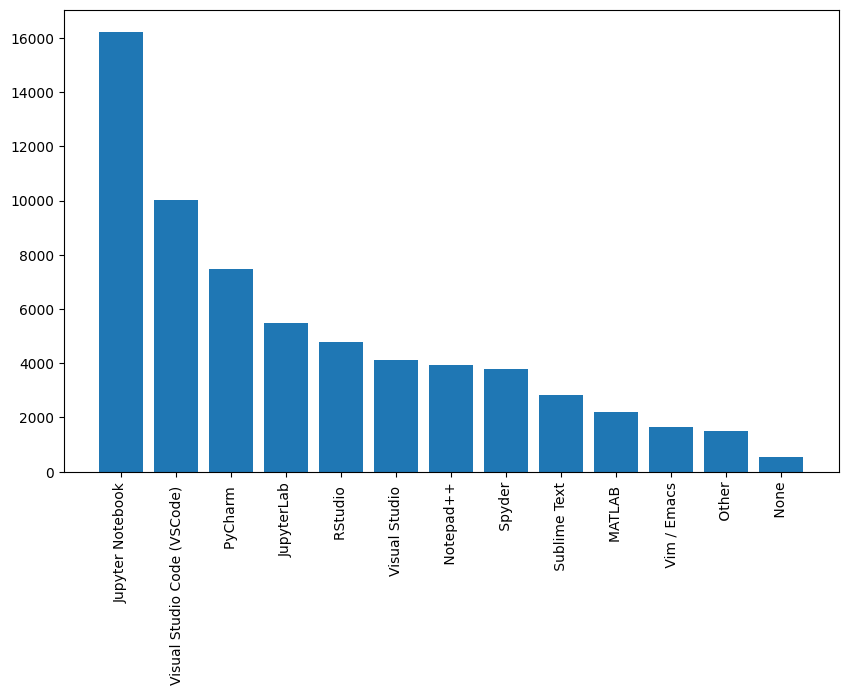

In [10]:
plt.figure()
plt.pie(nombres_ide["cantidad"], labels=nombres_ide["IDE_name"])
plt.show()
plt.figure(figsize= (10,6))
plt.bar(nombres_ide["IDE_name"],nombres_ide["cantidad"])
plt.xticks(rotation = 90)
plt.show();


## COLUMNA LENGUAJE_UTILIZADO

Dividimos por columnas, creando un Dataframe nuevo, y contamos cuantas veces aparece cada valor

In [11]:
df_lenguaje = df['lenguaje_utilizado'].str.split(',',expand=True) #Creamos el df_lenguaje con los valores de la columna lenguaje_utilizado separado por columnas
df_lenguaje

,0,1,2,3,4,5,6,7,8,9,10,11
0,Python,R,None,None,None,None,None,None,None,None,None,None
1,SQL,C,C++,Java,None,None,None,None,None,None,None,None
2,Python,C++,Java,None,None,None,None,None,None,None,None,None
3,Python,None,None,None,None,None,None,None,None,None,None,None
4,Python,C,MATLAB,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
25968,Python,SQL,Javascript,Bash,None,None,None,None,None,None,None,None
25969,Python,None,None,None,None,None,None,None,None,None,None,None
25970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,Python,SQL,None,None,None,None,None,None,None,None,None,None


In [12]:
#Sacamos los valores únicos de df_lenguaje
df_lenguaje.stack().value_counts()

Python         21860
 SQL           10756
 C++            5535
 R              5334
 Java           4769
 C              4709
 Javascript     4332
 MATLAB         2935
 Other          2575
 Bash           2216
 None            319
 Julia           305
 Swift           242
dtype: int64

In [13]:
# Creamos un DF con la suma de los valores únicos
lenguajes = df_lenguaje.stack().value_counts().reset_index() # contamos valores únicos de lenguaje
lenguajes.rename(columns= {"index": "lenguajes_programacion", 0: "suma"}, inplace= True)
lenguajes

,lenguajes_programacion,suma
0,Python,21860
1,SQL,10756
2,C++,5535
3,R,5334
4,Java,4769
5,C,4709
6,Javascript,4332
7,MATLAB,2935
8,Other,2575
9,Bash,2216


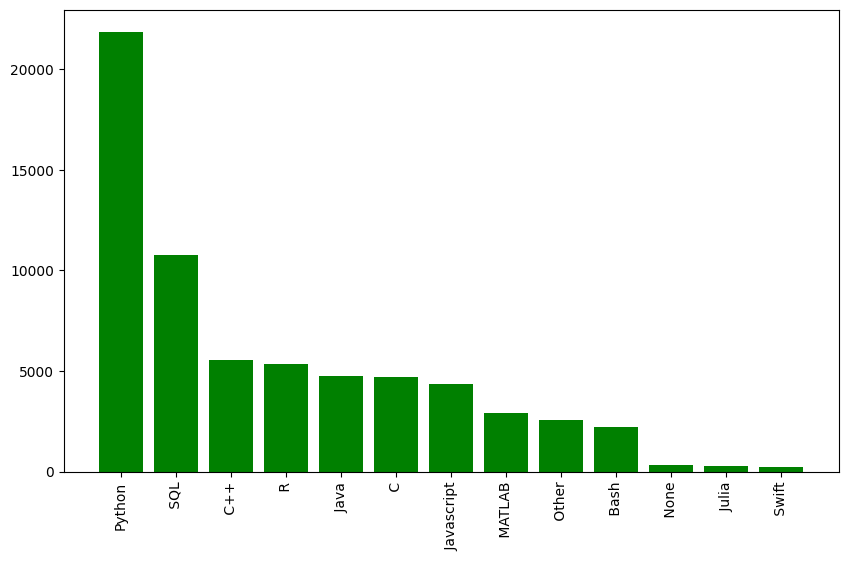

In [14]:
# countplot de lenguajes
plt.figure(figsize= (10,6))
plt.bar(lenguajes["lenguajes_programacion"],lenguajes["suma"], color = "green")
plt.xticks(rotation = 90)
plt.show();


## HERRAMIENTAS DE VISUALIZACIÓN

Creamos un Dataframe solo con las columnas index, age, gender, puesto_trabajo y herramientas_visualizacion

In [16]:
df_visualizacion = df[["edad", "genero", "puesto_trabajo", "salario","herramientas_visualizacion"]]

In [17]:
df_visualizacion.head(10)

,edad,genero,puesto_trabajo,salario,herramientas_visualizacion
0,50-54,Man,Other,30000.0,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ..."
1,50-54,Man,Program/Project Manager,70000.0,Matplotlib
2,22-24,Man,Software Engineer,1000.0,Matplotlib
3,45-49,Man,Research Scientist,40000.0,Matplotlib
4,45-49,Man,Other,40000.0,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
5,25-29,Woman,Currently not employed,NaN,"Matplotlib ,Seaborn ,Ggplot / ggplot2"
6,18-21,Woman,Student,NaN,Geoplotlib
7,30-34,Man,Data Scientist,20000.0,"Matplotlib ,Plotly / Plotly Express"
8,22-24,Man,Currently not employed,NaN,Matplotlib
9,30-34,Man,Other,1000.0,"Matplotlib ,Seaborn"


In [18]:
df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",") #Convertimos la columna "herramientas_visualizacion" en lista

/tmp/ipykernel_2146/574524737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualizacion["herramientas_visualizacion"] = df_visualizacion['herramientas_visualizacion'].str.split(",") #Convertimos la columna "herramientas_visualizacion" en lista


In [19]:
# Comprobamos que son listas
df_visualizacion.head()

,edad,genero,puesto_trabajo,salario,herramientas_visualizacion
0,50-54,Man,Other,30000.0,"[ Matplotlib , Seaborn , Ggplot / ggplot2 , Sh..."
1,50-54,Man,Program/Project Manager,70000.0,[ Matplotlib ]
2,22-24,Man,Software Engineer,1000.0,[ Matplotlib ]
3,45-49,Man,Research Scientist,40000.0,[ Matplotlib ]
4,45-49,Man,Other,40000.0,"[ Matplotlib , Seaborn , Ggplot / ggplot2 ]"


In [20]:
df_visualizacion = df_visualizacion.explode("herramientas_visualizacion") #Con explode, separamos las listas en filas

In [21]:
# Comprobamos
df_visualizacion.head()

,edad,genero,puesto_trabajo,salario,herramientas_visualizacion
0,50-54,Man,Other,30000.0,Matplotlib
0,50-54,Man,Other,30000.0,Seaborn
0,50-54,Man,Other,30000.0,Ggplot / ggplot2
0,50-54,Man,Other,30000.0,Shiny
0,50-54,Man,Other,30000.0,Leaflet / Folium


GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES Y ESTUDIANTES

In [22]:
# Creamos una lista con los diferentes valores para ordenar los subplots
lista_visualizacion = list(df_visualizacion["herramientas_visualizacion"][df_visualizacion["herramientas_visualizacion"].notnull()].unique())

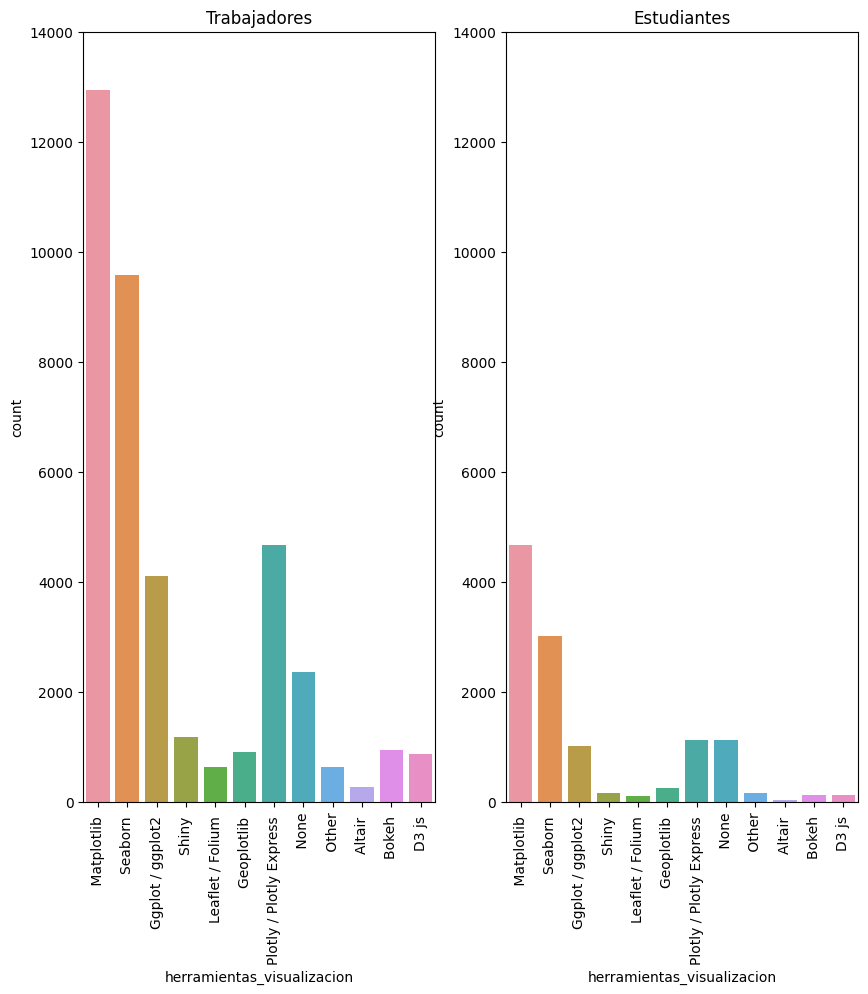

In [27]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
ax[0].set_ylim([0,14000])
ax[1].set_ylim([0,14000])
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], ax=ax[0], order=lista_visualizacion)
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_visualizacion)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()

In [28]:
def trabajador(puesto):
    if puesto == "Student" or puesto == "Currently not employed":
        return "Student or unemployed"
    else:
        return "Employee"

In [29]:
df_visualizacion["trabajo"] = df_visualizacion["puesto_trabajo"].apply(trabajador)

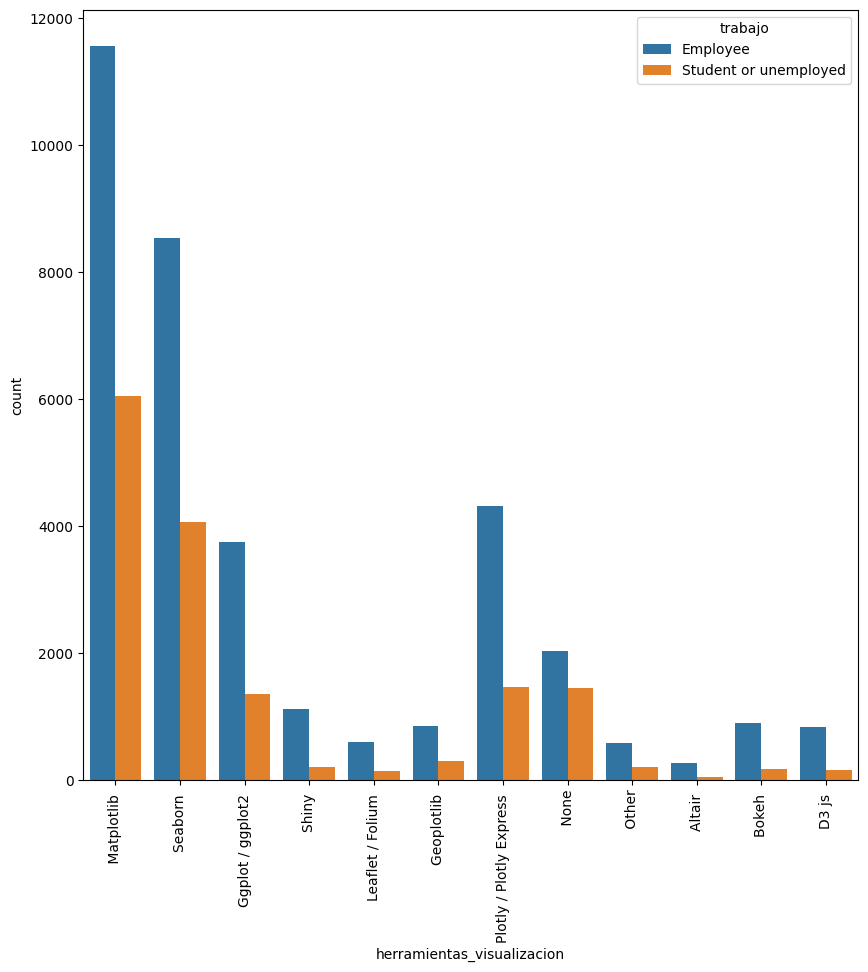

In [30]:
plt.figure(figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion, hue= "trabajo", order=lista_visualizacion)
plt.xticks(rotation = 90)

fig.show()

GRAFICA CON LAS HERRAMIENTAS DE VISUALIZACION PARA TRABAJADORES POR GÉNERO

Text(0.5, 1.0, 'Herramientas de visualización por género')

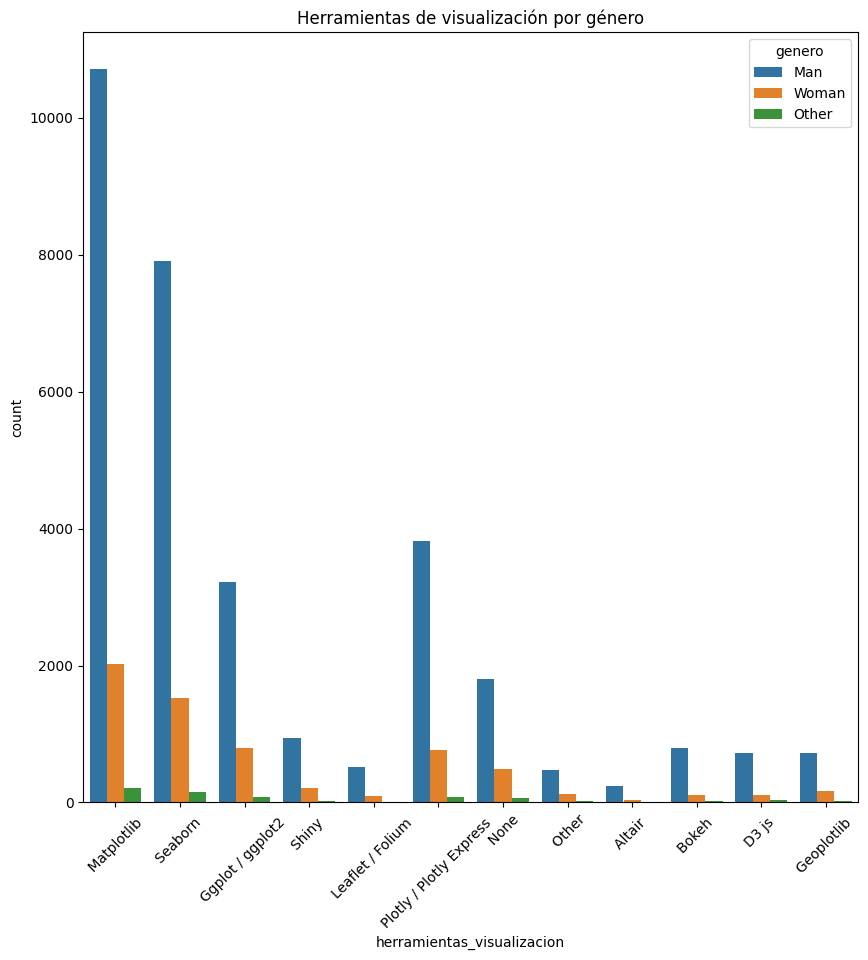

In [32]:
plt.figure(figsize= (10,10))
sns.countplot(x = "herramientas_visualizacion", data=df_visualizacion[df_visualizacion["puesto_trabajo"]!= "Student"], hue="genero")
plt.xticks(rotation = 45)
plt.title("Herramientas de visualización por género")


## PREGUNTA LENGUAJE RECOMENDADO

In [33]:
# Comprobamos los valores únicos
df["lenguaje_recomendado"].value_counts()

Python        20213
R              1445
SQL            1338
C               440
C++             437
Java            242
MATLAB          215
Other           176
Julia           137
Javascript      133
None            111
Bash             38
Swift            15
Name: lenguaje_recomendado, dtype: int64

In [34]:
# Creamos una lista para ordenar los subplots
lista_leng = list(df["lenguaje_recomendado"].unique())

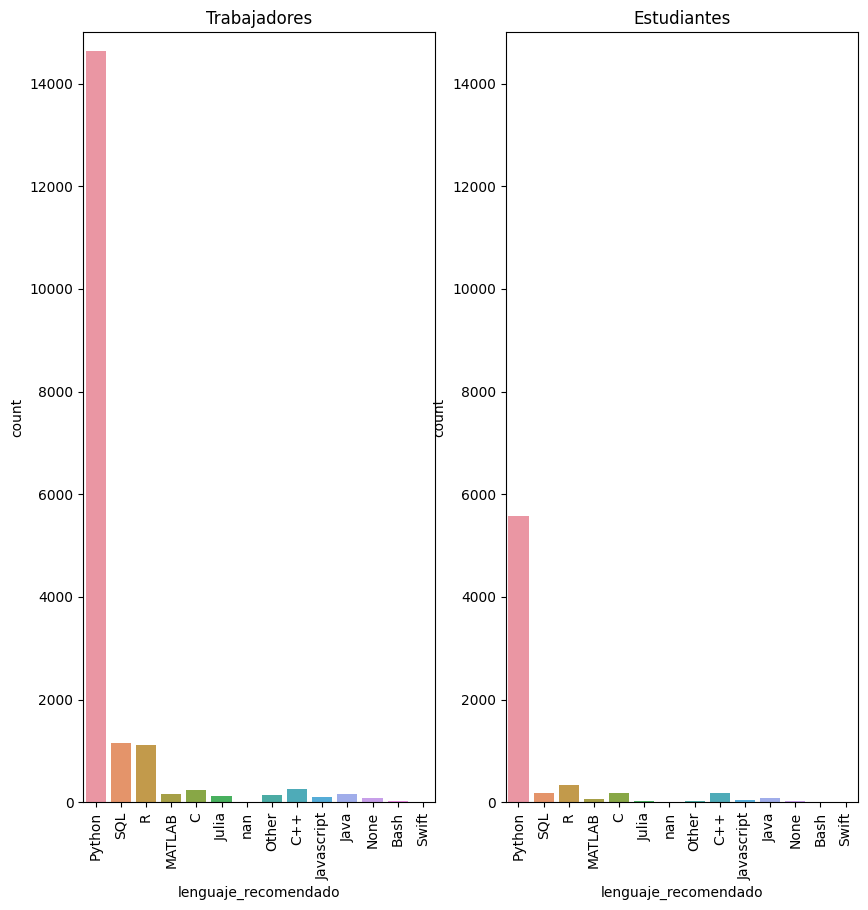

In [37]:
fig,ax = plt.subplots(1,2, figsize= (10,10))
ax[0].set_ylim([0,15000])
ax[1].set_ylim([0,15000])
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]!= "Student"], ax=ax[0], order= lista_leng)
sns.countplot(x = "lenguaje_recomendado", data=df[df["puesto_trabajo"]== "Student"], ax=ax[1], order= lista_leng)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
ax[0].set_title("Trabajadores")
ax[1].set_title("Estudiantes")
fig.show()

### Edades de los encuestados

In [38]:
# organizar columna age para que sea más legible
df['edad'].value_counts().sort_index(ascending=True)

18-21    4901
22-24    4694
25-29    4931
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: edad, dtype: int64

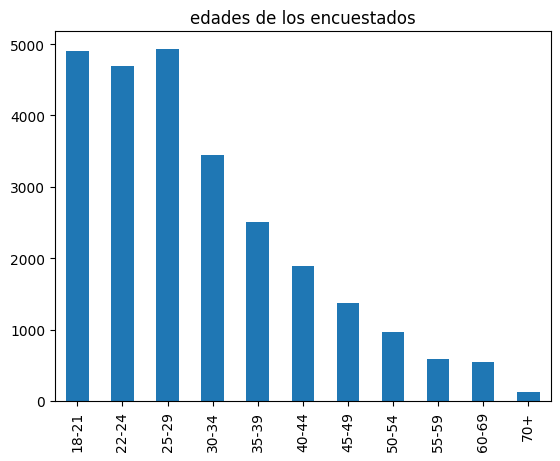

In [40]:
plot = df['edad'].value_counts().sort_index(ascending=True).plot(kind='bar', title = 'edades de los encuestados')

In [ ]:
df.head(1)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,29999.0,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plataformas en las que se hacen cursos ----> pregunta Q40

In [41]:
# creamos dataframe plataformas en las que se hacen cursos

plat_cursos_q40 = df.loc[:,'Q40_coursera':'Q40_other'].notnull().sum().reset_index()
plat_cursos_q40.rename(columns= {"index": "plat_cursos",0: "cantidad"}, inplace= True)
plat_cursos_q40.sort_values('cantidad',ascending=False, inplace= True)
plat_cursos_q40

KeyError: 'Q40_coursera'

In [ ]:
#eliminar Q40_ de la columna plat_cursos
def eliminar_q(col):
  new_col = re.sub('Q\d{2}_','',col)
  return new_col

In [ ]:
plat_cursos_q40['plat_cursos'] = plat_cursos_q40['plat_cursos'].apply(eliminar_q)
plat_cursos_q40

,plat_cursos,cantidad
0,coursera,9649
2,kaggle_learn_courses,8670
6,udemy,6440
9,university_courses,4882
3,datacamp,3996
1,edx,3028
5,udacity,2803
7,linkedin_learning,2693
11,other,2081
8,cloud-certification,1804


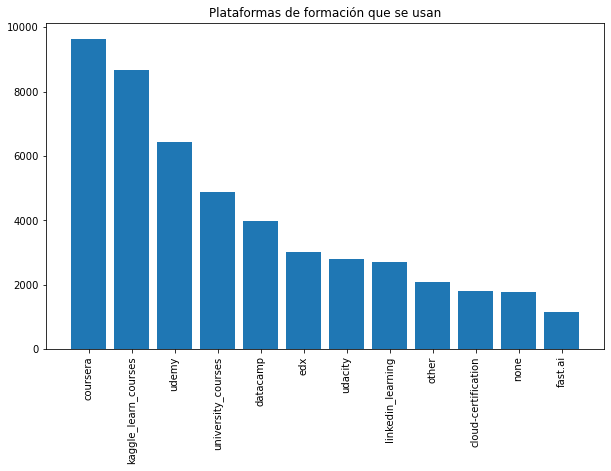

In [ ]:
plt.figure
plt.figure(figsize= (10,6))
plt.bar(plat_cursos_q40["plat_cursos"],plat_cursos_q40["cantidad"])
plt.title(label = 'Plataformas de formación que se usan')
plt.xticks(rotation = 90)
plt.show()


Tabla de frecuencias 

In [ ]:
df_q40_gender = df.groupby('gender')['Q40_coursera','Q40_edx','Q40_kaggle_learn_courses','Q40_datacamp','Q40_fast.ai','Q40_udacity','Q40_udemy','Q40_linkedin_learning','Q40_cloud-certification','Q40_university_courses','Q40_none','Q40_other'].count().reset_index()
df_q40_gender

/tmp/ipykernel_954/1951419042.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_q40_gender = df.groupby('gender')['Q40_coursera','Q40_edx','Q40_kaggle_learn_courses','Q40_datacamp','Q40_fast.ai','Q40_udacity','Q40_udemy','Q40_linkedin_learning','Q40_cloud-certification','Q40_university_courses','Q40_none','Q40_other'].count().reset_index()


,gender,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other
0,Man,7778,2466,7056,3108,988,2299,5240,2068,1426,3774,1483,1660
1,Nonbinary,24,8,31,14,9,9,17,11,9,18,9,14
2,Prefer not to say,124,40,107,46,19,31,69,35,26,71,36,27
3,Prefer to self-describe,11,2,10,3,2,5,8,5,2,8,2,5
4,Woman,1712,512,1466,825,139,459,1106,574,341,1011,232,375


In [ ]:
#  Quitamos la columna categórica para que haga el cálculo de la frecuencia relativa
df_q40_gender_sin_strings = df_q40_gender.drop("gender", axis = 1) 
df_q40_gender_sin_strings

,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other
0,7778,2466,7056,3108,988,2299,5240,2068,1426,3774,1483,1660
1,24,8,31,14,9,9,17,11,9,18,9,14
2,124,40,107,46,19,31,69,35,26,71,36,27
3,11,2,10,3,2,5,8,5,2,8,2,5
4,1712,512,1466,825,139,459,1106,574,341,1011,232,375


In [ ]:
# hacemos ahora la tabla de frecuencias relativa
frecuencia_relativa = (df_q40_gender_sin_strings / df.shape[0]) * 100 
frecuencia_relativa

,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other
0,29.946483,9.494475,27.166673,11.966273,3.803950,8.851500,20.174797,7.962115,5.490317,14.530474,5.709776,6.391252
1,0.092404,0.030801,0.119355,0.053902,0.034651,0.034651,0.065453,0.042352,0.034651,0.069303,0.034651,0.053902
2,0.477419,0.154006,0.411966,0.177107,0.073153,0.119355,0.265660,0.134755,0.100104,0.273361,0.138605,0.103954
3,0.042352,0.007700,0.038502,0.011550,0.007700,0.019251,0.030801,0.019251,0.007700,0.030801,0.007700,0.019251
4,6.591460,1.971278,5.644323,3.176375,0.535171,1.767220,4.258268,2.209987,1.312902,3.892504,0.893235,1.443807


In [ ]:
#reunimos las columnas 
columnas = df_q40_gender_sin_strings.columns 
df_q40_gender[columnas] = frecuencia_relativa
df_q40_gender

,gender,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other
0,Man,29.946483,9.494475,27.166673,11.966273,3.803950,8.851500,20.174797,7.962115,5.490317,14.530474,5.709776,6.391252
1,Nonbinary,0.092404,0.030801,0.119355,0.053902,0.034651,0.034651,0.065453,0.042352,0.034651,0.069303,0.034651,0.053902
2,Prefer not to say,0.477419,0.154006,0.411966,0.177107,0.073153,0.119355,0.265660,0.134755,0.100104,0.273361,0.138605,0.103954
3,Prefer to self-describe,0.042352,0.007700,0.038502,0.011550,0.007700,0.019251,0.030801,0.019251,0.007700,0.030801,0.007700,0.019251
4,Woman,6.591460,1.971278,5.644323,3.176375,0.535171,1.767220,4.258268,2.209987,1.312902,3.892504,0.893235,1.443807


### Sitios donde se comparte el trabajo públicamente ---->  pregunta Q39

In [ ]:
df.head(1)

,age,gender,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q10_kaggle,Q10_colab,Q10_none,Q28,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx,Q40_kaggle_learn_courses,Q40_datacamp,Q40_fast.ai,Q40_udacity,Q40_udemy,Q40_linkedin_learning,Q40_cloud-certification,Q40_university_courses,Q40_none,Q40_other,Q27_amazon_web_services_(aws),Q27_microsoft_azure,Q27_google_cloud_platform_(gcp),Q27_ibm_cloud_/_red_hat,Q27_oracle_cloud,Q27_sap_cloud,Q27_vmware_cloud,Q27_salesforce_cloud,Q27_alibaba_cloud,Q27_tencent_cloud,Q27_none,Q27_other,Q29_amazon_elastic_compute_cloud_(ec2),Q29_microsoft_azure_virtual_machines,Q29_google_cloud_compute_engine,Q29_none,Q31_amazon_sagemaker,Q31_azure_machine_learning_studio,Q31_google_cloud_vertex_ai,Q31_datarobot,Q31_databricks,Q31_dataiku,Q31_alteryx,Q31_rapidminer,Q31_none,Q31_other,Q32_mysql,Q32_postgresql,Q32_sqlite,Q32_oracle_database,Q32_mongodb,Q32_snowflake,Q32_ibm_db2,Q32_microsoft_sql_server,Q32_microsoft_azure_sql_database,Q32_microsoft_azure_cosmos_db,Q32_amazon_redshift,Q32_amazon_aurora,Q32_amazon_dynamodb,Q32_amazon_rds,Q32_google_cloud_bigquery,Q32_google_cloud_sql,Q32_google_cloud_firestore,Q32_google_cloud_bigtable,Q32_google_cloud_spanner,Q32_none,Q34_microsoft_power_bi,Q34_amazon_quicksight,Q34_google_data_studio,Q34_looker,Q34_tableau,Q34_salesforce,Q34_tableau_crm,Q34_qlik,Q34_domo,Q34_tibco_spotfire,Q34_alteryx,Q34_sisense,Q34_sap_analytics_cloud,Q34_microsoft_azure_synapse,Q34_thoughtspot,Q34_none,Q34_other,Q36_data_augmentation,Q36_feature_engineering/selection,Q36_model_selection,Q36_model_architecture_searches,Q36_hyperparameter_tuning,Q36_full_ml_pipelines,Q36_none,Q36_other,Q37_google_cloud_automl,Q37_h2o_driverless_ai,Q37_databricks_automl,Q37_datarobot_automl,Q37_amazon_sagemaker_autopilot,Q37_azure_automated_machine_learning,Q37_none,Q37_other,Q38_neptune.ai,Q38_weights_&_biases,Q38_comet.ml,Q38_sacred_+_omniboard,Q38_tensorboard,Q38_guild.ai,Q38_polyaxon,Q38_clearml,Q38_domino_model_monitor,Q38_mlflow,Q38_none,Q38_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,29999.0,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,NaN,NaN,GitHub,Kaggle,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tabla de frecuencias

In [ ]:
df_q39_puesto = df.groupby('puesto_trabajo')['Q39__github','Q39__kaggle','Q39__colab','Q39_none','Q40_coursera','Q40_edx'].count().reset_index()
df_q39_puesto

/tmp/ipykernel_954/852492993.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_q39_puesto = df.groupby('puesto_trabajo')['Q39__github','Q39__kaggle','Q39__colab','Q39_none','Q40_coursera','Q40_edx'].count().reset_index()


,puesto_trabajo,Q39__github,Q39__kaggle,Q39__colab,Q39_none,Q40_coursera,Q40_edx
0,Business Analyst,183,135,78,193,332,131
1,Currently not employed,0,0,0,0,673,234
2,DBA/Database Engineer,34,23,15,32,62,26
3,Data Analyst,562,438,197,417,892,308
4,Data Engineer,214,116,76,135,263,88
5,Data Scientist,1232,761,497,669,1710,519
6,Developer Relations/Advocacy,20,18,9,14,35,11
7,Machine Learning Engineer,514,316,259,220,636,155
8,Other,419,346,157,475,926,321
9,Product Manager,75,54,25,58,113,41


In [ ]:
# creamos dataframe sitios donde se comparte
df_compartir = df.loc[:,'Q39__github':'Q39_none'].notnull().sum().reset_index()
df_compartir.rename(columns= {"index": "sitios_compartir",0: "cantidad"}, inplace= True)
df_compartir.sort_values('cantidad',ascending=False, inplace= True)
df_compartir

,sitios_compartir,cantidad
0,Q39__github,4586
3,Q39_none,3167
1,Q39__kaggle,3065
2,Q39__colab,1848


In [ ]:
#eliminar Q39_ de la columna plat_cursos
def eliminar_q(col):
  new_col = re.sub('Q\d{2}_','',col)
  return new_col
df_compartir['sitios_compartir'] = df_compartir['sitios_compartir'].apply(eliminar_q)
df_compartir

,sitios_compartir,cantidad
0,_github,4586
3,none,3167
1,_kaggle,3065
2,_colab,1848


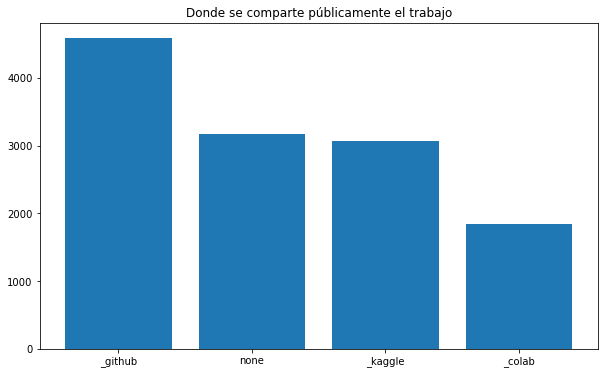

In [ ]:
plt.figure
plt.figure(figsize= (10,6))
plt.bar(df_compartir["sitios_compartir"],df_compartir["cantidad"])
plt.title(label = 'Donde se comparte públicamente el trabajo')
plt.show()


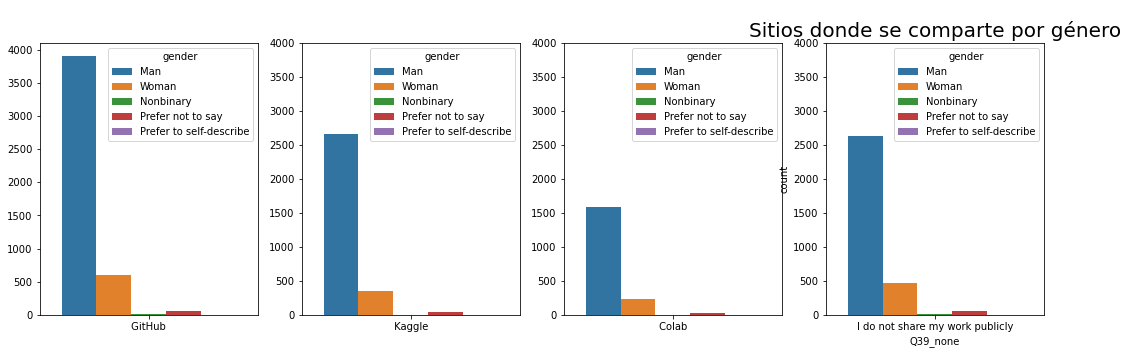

In [ ]:
fig, axes = plt.subplots(1,4)
fig.set_size_inches(18,5)
plt.title(label = 'Sitios donde se comparte por género',fontsize = 20)
plt.suptitle(" ")
axes[1].set_ylim([0,4000])
axes[2].set_ylim([0,4000])
axes[3].set_ylim([0,4000])
sns.countplot(ax=axes[0],  x= "Q39__github" , data = df, hue='gender')
axes[0].set_ylabel("")
axes[0].set_xlabel("")
sns.countplot(ax=axes[1],  x= "Q39__kaggle" , data = df, hue='gender')
axes[1].set_ylabel("")
axes[1].set_xlabel("")
sns.countplot(ax=axes[2],  x= "Q39__colab" , data = df, hue='gender')
axes[2].set_ylabel("")
axes[2].set_xlabel("")
sns.countplot(ax=axes[3],  x= "Q39_none" , data = df, hue='gender')
fig.show()

## Tablas de contingencia

In [42]:
salario_puesto = pd.crosstab(df['salario'],df['puesto_trabajo'])
salario_puesto.sort_values('salario',ascending = True,inplace=True)
salario_puesto

puesto_trabajo,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician
salario,,,,,,,,,,,,,
1000.0,150,23,529,109,731,26,447,423,28,102,262,442,97
2000.0,61,5,182,44,209,3,93,90,7,34,84,132,25
3000.0,39,9,78,29,101,2,57,67,14,25,53,92,9
4000.0,19,3,72,13,68,2,30,54,4,16,34,58,7
5000.0,34,6,68,18,73,1,45,74,5,17,43,68,4
7500.0,46,15,112,27,100,3,50,126,6,31,52,125,6
10000.0,45,4,95,19,86,3,36,96,13,17,37,89,12
15000.0,62,10,145,35,163,7,74,152,11,42,75,161,13
20000.0,40,6,76,22,114,4,36,70,11,27,75,84,8


In [43]:
puesto_genero = pd.crosstab(df['genero'],df['puesto_trabajo']).T
puesto_genero

genero,Man,Other,Woman
puesto_trabajo,,,
Business Analyst,779,14,175
Currently not employed,1479,44,463
DBA/Database Engineer,141,10,20
Data Analyst,1759,37,505
Data Engineer,561,9,98
Data Scientist,2971,61,584
Developer Relations/Advocacy,79,4,16
Machine Learning Engineer,1285,35,179
Other,1926,38,429


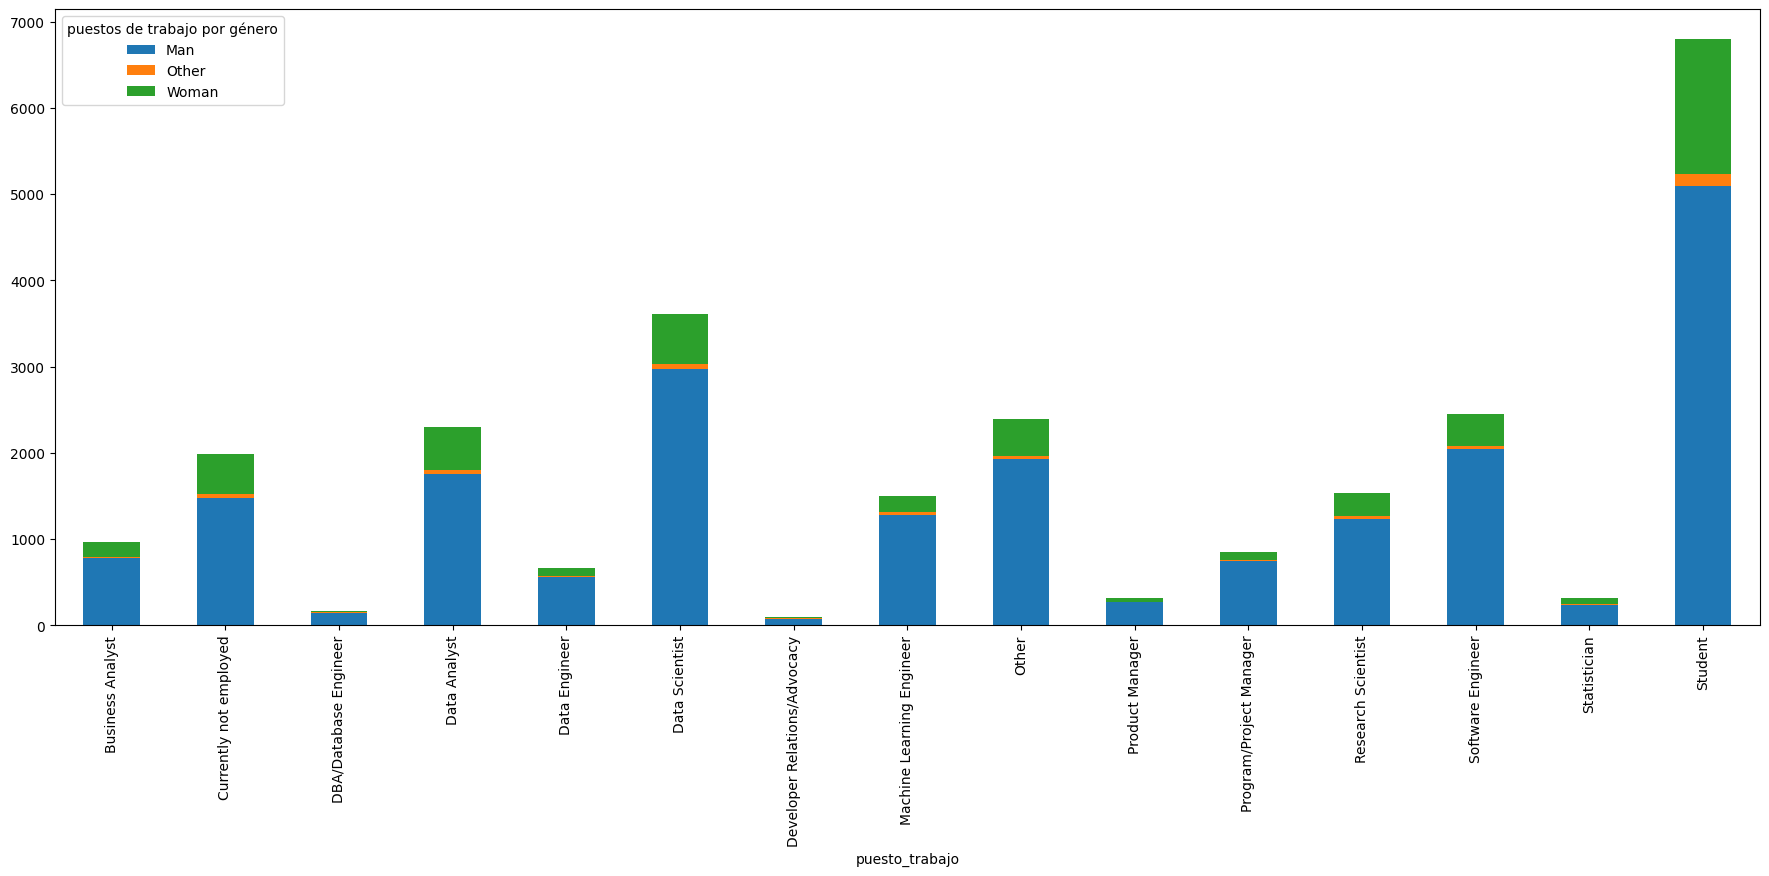

In [44]:
puesto_genero.plot.bar(stacked=True, figsize = (22,8))
plt.legend(title='puestos de trabajo por género')
plt.show()

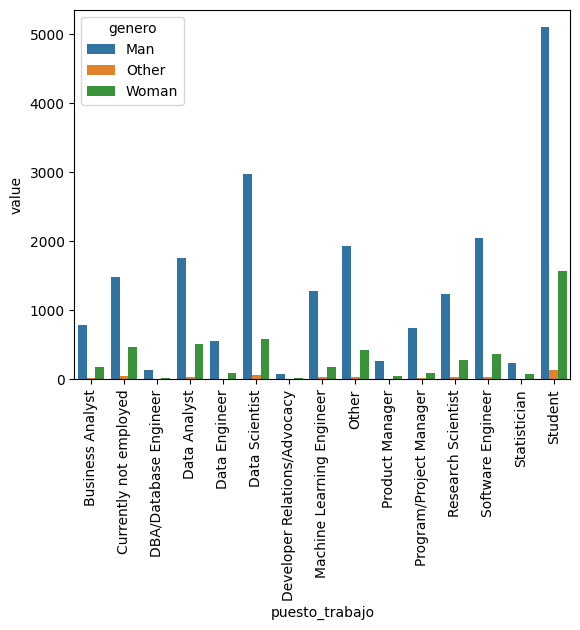

In [48]:
my_crosstab = pd.crosstab(df.puesto_trabajo,df.genero)
stacked= my_crosstab.stack().reset_index().rename(columns={0:'value'})
plt.xticks(rotation = 90)
sns.barplot(x = stacked.puesto_trabajo, y =stacked.value, hue = stacked.genero);

In [49]:
puesto_edad = pd.crosstab(df['puesto_trabajo'],df['edad'])
puesto_edad

edad,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
puesto_trabajo,,,,,,,,,,,
Business Analyst,45,119,200,170,135,107,72,54,27,35,4
Currently not employed,140,444,514,264,185,138,97,81,51,53,19
DBA/Database Engineer,9,20,17,30,22,21,11,18,10,12,1
Data Analyst,191,419,588,420,280,163,105,67,32,28,8
Data Engineer,41,114,146,104,92,66,45,28,19,11,2
Data Scientist,343,594,907,625,414,317,172,117,66,50,11
Developer Relations/Advocacy,7,12,12,14,19,9,6,13,1,4,2
Machine Learning Engineer,239,336,377,221,130,82,39,36,20,18,1
Other,52,190,410,418,360,275,250,166,125,115,32


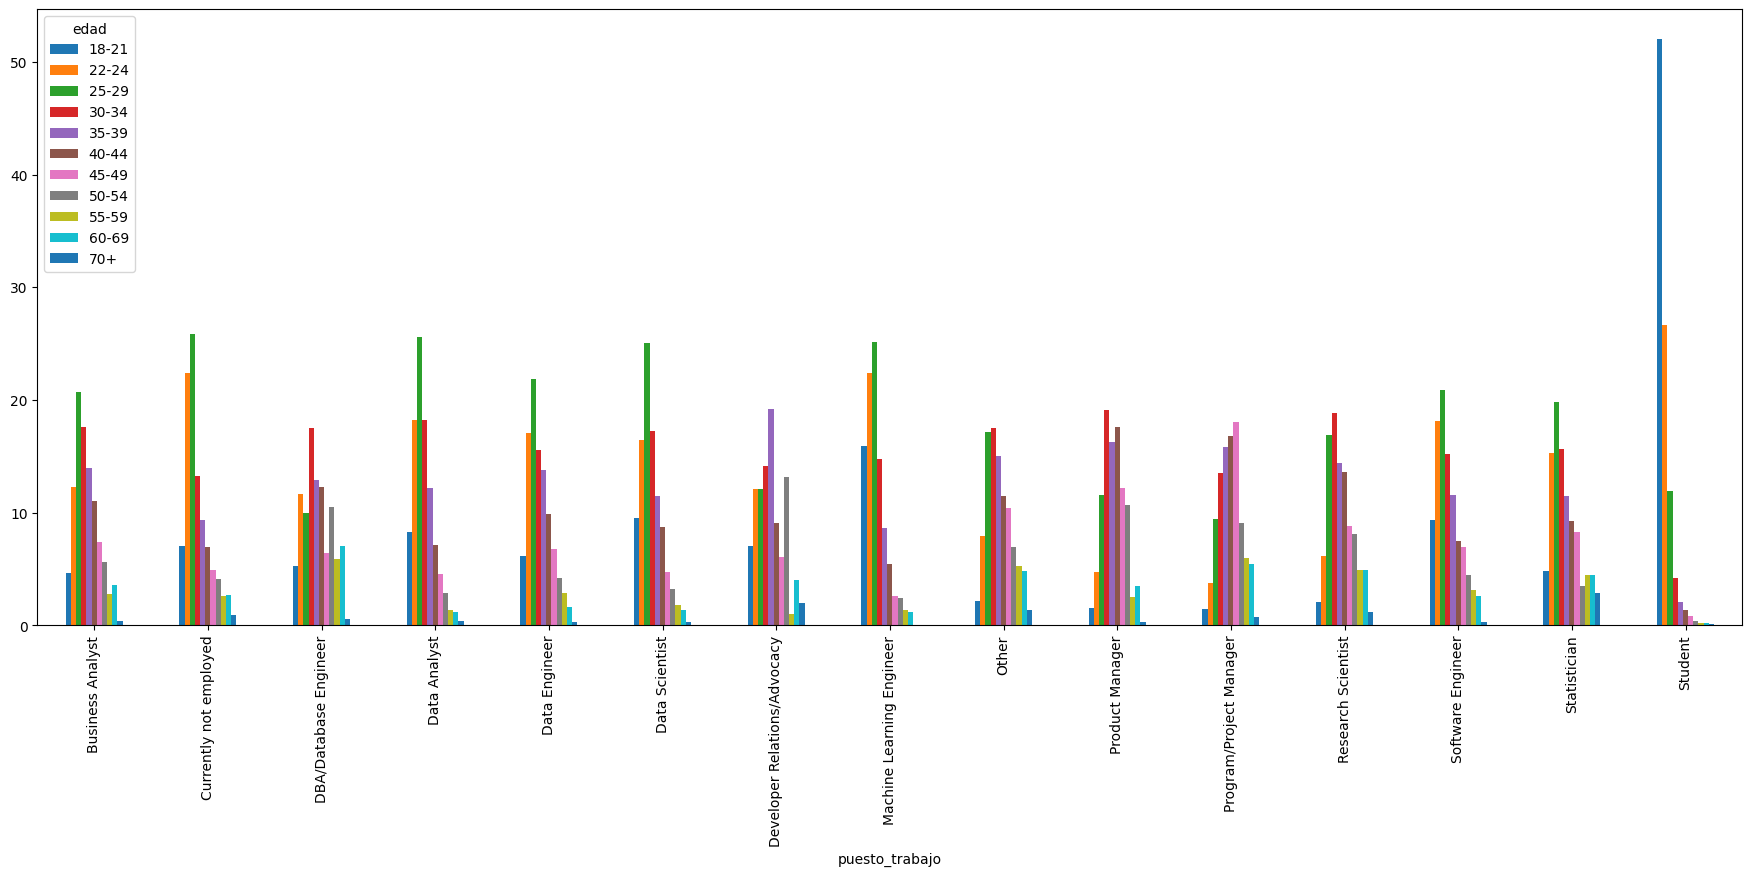

In [50]:
plot= pd.crosstab(index = df['puesto_trabajo'], columns= df['edad']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar',figsize = (22,8))

## OUTLIERS

Función para detectar outliers

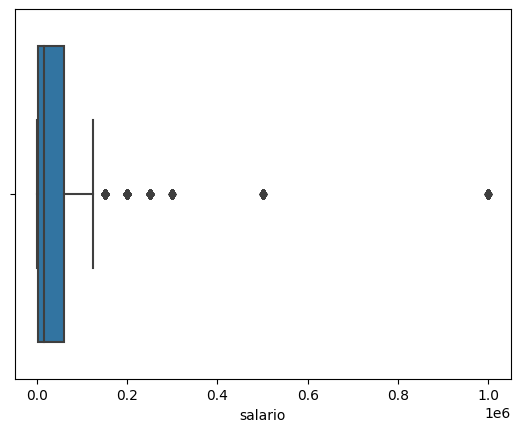

In [51]:
sns.boxplot(x= "salario", data=df)
plt.show()

In [52]:
def detectar_outliers(dataframe):
    lista_columnas = list(dataframe.select_dtypes(include= np.number).columns)
    # creamos un diccionario donde almacenaremos índices de los outliers
    dicc_indices = {} 
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [53]:
# Ejecutamos la función y guardamos la lista de indices
indices_outliers = detectar_outliers(df)


In [54]:
print(indices_outliers)

{'salario': [76, 80, 89, 121, 158, 167, 184, 191, 239, 283, 285, 287, 354, 397, 434, 446, 454, 457, 488, 505, 513, 515, 517, 524, 527, 556, 630, 647, 648, 658, 698, 705, 711, 737, 741, 743, 745, 749, 859, 885, 895, 906, 937, 968, 979, 1025, 1068, 1076, 1087, 1129, 1214, 1218, 1262, 1263, 1280, 1314, 1322, 1373, 1427, 1496, 1516, 1533, 1538, 1547, 1554, 1568, 1573, 1587, 1611, 1624, 1625, 1648, 1650, 1661, 1688, 1710, 1742, 1750, 1759, 1783, 1815, 1831, 1879, 1899, 1914, 1923, 1929, 1975, 1987, 2006, 2014, 2060, 2087, 2149, 2167, 2178, 2179, 2190, 2213, 2217, 2232, 2242, 2252, 2270, 2290, 2299, 2360, 2382, 2435, 2436, 2438, 2440, 2447, 2458, 2489, 2556, 2557, 2560, 2587, 2599, 2605, 2648, 2666, 2669, 2734, 2777, 2840, 2875, 2887, 2888, 2903, 2905, 2908, 2910, 2915, 3027, 3035, 3060, 3077, 3084, 3100, 3179, 3243, 3284, 3288, 3310, 3324, 3349, 3408, 3444, 3509, 3523, 3538, 3549, 3556, 3570, 3578, 3592, 3597, 3603, 3614, 3635, 3645, 3697, 3704, 3706, 3707, 3717, 3799, 3802, 3829, 3861, 398

Porcentaje de outliers

In [55]:
len(indices_outliers["salario"]) *100 / df.shape[0]

4.635583105532668

In [56]:
for k, v in indices_outliers.items():
    mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = mediana

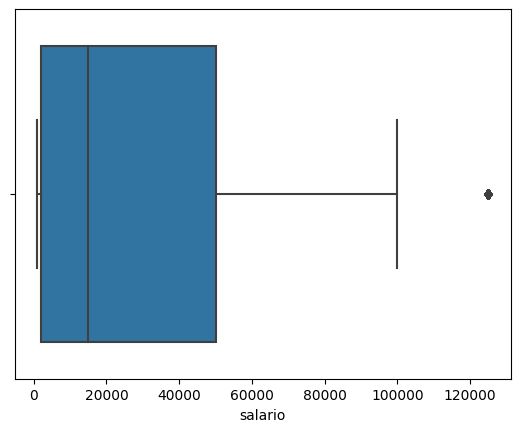

In [57]:
sns.boxplot(x= "salario", data=df)
plt.show()

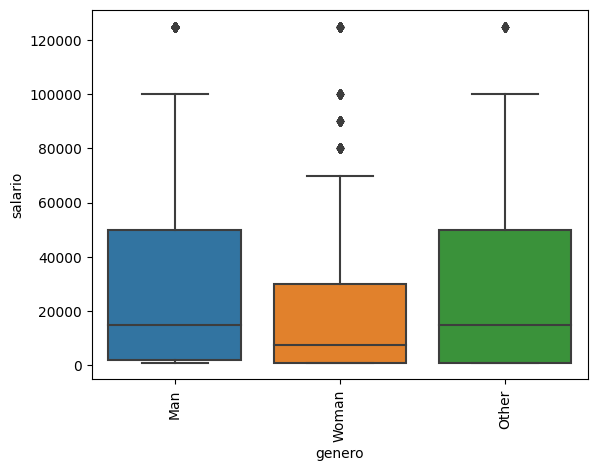

In [59]:
sns.boxplot(x = "genero", y = "salario", data = df)
plt.xticks(rotation = 90); 

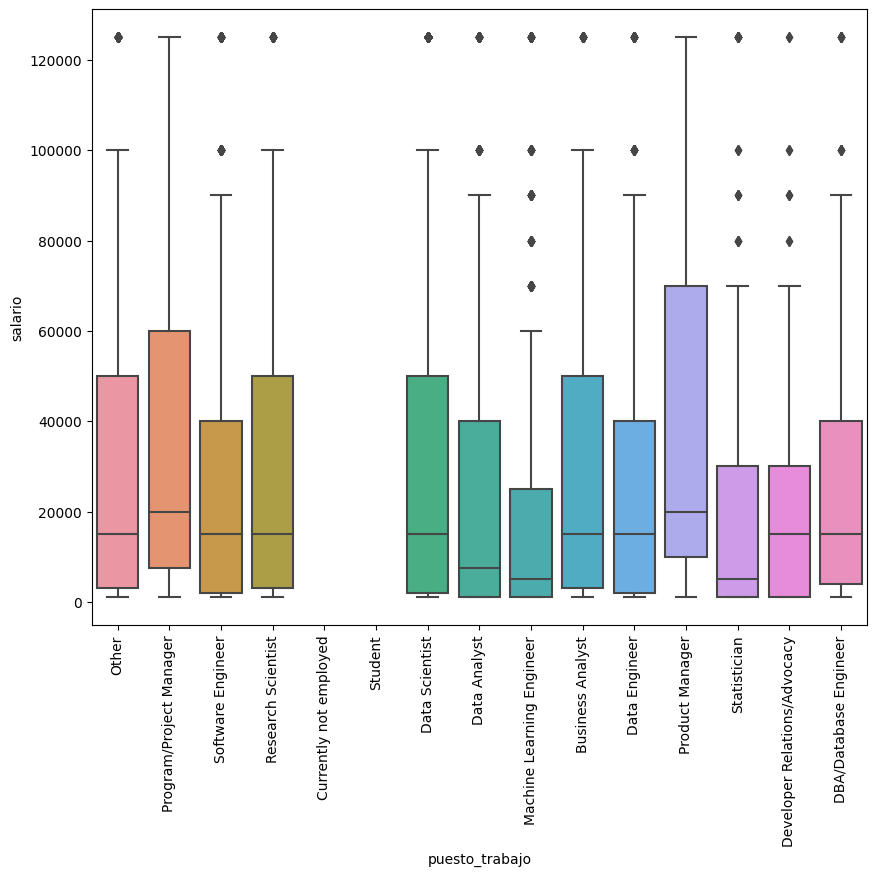

In [60]:
plt.figure(figsize =(10,8))
sns.boxplot(x = "puesto_trabajo", y = "salario", data = df)
plt.xticks(rotation = 90); 

# NULOS SALARIO (NUMERICA)

In [61]:
df.salario.isnull().sum() *100 / df.shape[0]

40.74230932121819

Función reemplazar los nulos con el método KNNImputer

In [ ]:
def reemp_nulos_num_KNN(dataf):
    # Primero sacamos las variables numéricas con select_dtypes
    num = dataf.select_dtypes(include = np.number)
    # Iniciamos el KNNimputer
    imputerKNN = KNNImputer(n_neighbors=5)
    # Aplicamos el imputer a las variables numericas
    imputerKNN.fit(num)
    # Transformamos los datos para que se transformen los nulos, y como nos devuelve un array
    # lo transformamos directamente en dataframe
    df_knn = pd.DataFrame(imputerKNN.transform(num), columns = num.columns)
    # Sacamos el nombre de las columnas del data sin nulos
    columnas = df_knn.columns
    # Utilizando esta lista de columnas, eliminamos estas del dataframe
    dataf.drop(columnas, axis= 1, inplace = True)
    # creamos nuevas columnas en el dataframe original, basándonos en estas columnas numericas sin nulos
    dataf[columnas] = df_knn[columnas]
    # Nos devuelve la suma de nulos del dataframe, para comprobar que se hayan borrado los nulos
    return dataf.isnull().sum()

Ejecutamos la función en una copia del dataframe

In [ ]:
df2 = df.copy()

In [ ]:
reemp_nulos_num_KNN(df2)

age                   0
gender                0
pais                  0
estudios              0
puesto_trabajo        0
                  ...  
Q38_B_Part_9      25307
Q38_B_Part_10     23226
Q38_B_Part_11     21431
Q38_B_OTHER       25596
salario               0
Length: 138, dtype: int64

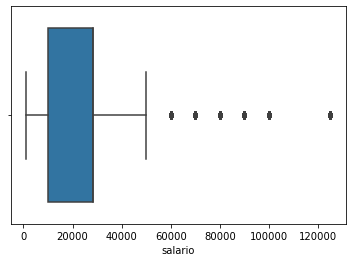

In [ ]:
sns.boxplot(x= "salario", data=df2)
plt.show()

# GRAFICAS COMPARACION NUMERICA Y CATEGORICAS

El swarmplot no funciona

In [ ]:
df_visualizacion.head(1)

,age,gender,puesto_trabajo,salario,herramientas_visualizacion
0,50-54,Man,Other,29999.0,Matplotlib


In [ ]:
df_visualizacion.herramientas_visualizacion.value_counts()

 Matplotlib                 17595
Seaborn                     12586
Plotly / Plotly Express      5778
Ggplot / ggplot2             5100
 None                        3479
Shiny                        1322
Geoplotlib                   1148
Bokeh                        1050
D3 js                         978
 Other                        776
Leaflet / Folium              716
Altair                        309
Name: herramientas_visualizacion, dtype: int64

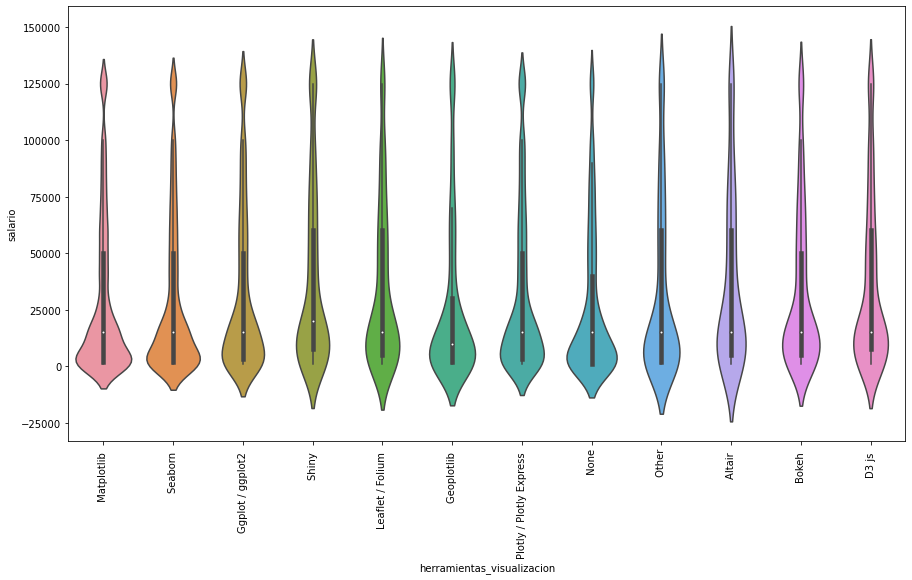

In [ ]:
plt.figure(figsize =(15,8))
sns.violinplot(x = "herramientas_visualizacion", y= "salario", data= df_visualizacion)
plt.xticks(rotation = 90);